# Kaggle Learn - Pandas

Working through lessons from https://www.kaggle.com/learn/pandas

## Level 5: Data types and missing data reference

In [1]:
import matplotlib.pylab as plt
import pandas as pd

pd.set_option('max_rows', 5)

In [4]:
reviews = pd.read_csv('data/winemag-data-130k-v2.csv')
reviews

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


### Data types

dtype - the data type of a column in a DataFrame or Series

columns of strings are type object
  this is because pandas stores pointers to the strings instead of the strings 
  too keep all objects in the column of equal size (in bytes)
  
pandas also supports categorical and timeseries types

In [18]:
# Get data types
print(reviews.price.dtype)
print(type(reviews.price.dtype))
print()
print(reviews.price.dtypes)
print(type(reviews.price.dtypes))
print()
print(reviews.dtypes)
print(type(reviews.dtypes))
print()
print(reviews.index.dtype)

float64
<class 'numpy.dtype'>

float64
<class 'numpy.dtype'>

Unnamed: 0     int64
country       object
               ...  
variety       object
winery        object
Length: 14, dtype: object
<class 'pandas.core.series.Series'>

int64


In [40]:
# Type conversion
print(reviews.points.dtype)
print(reviews.points.astype('float64'))
print()
print(reviews.price.dtype)
reviews.price.astype('str')

int64
0         87.0
1         87.0
          ... 
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

float64


0          nan
1         15.0
          ... 
129969    32.0
129970    21.0
Name: price, Length: 129971, dtype: object

### Missing data

NaN is use to represent all missing data

A number of methods exist for replacing (imputing) missing data.<br>
  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html


In [19]:
# Selecting NaN
reviews[reviews.country.isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129590,129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ
129900,129900,NaN,This wine offers a delightful bouquet of black...,NaN,91,32.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Psagot 2014 Merlot,Merlot,Psagot


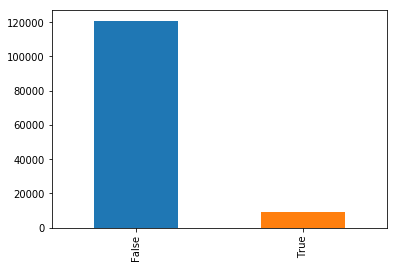

In [46]:
reviews.price.isnull()
reviews.price.isnull().value_counts().plot.bar()
plt.show()

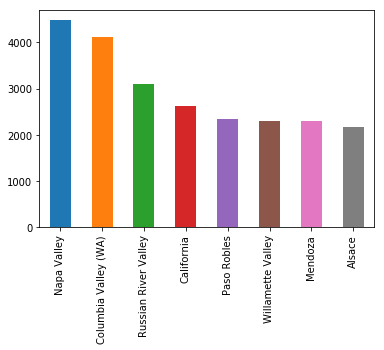

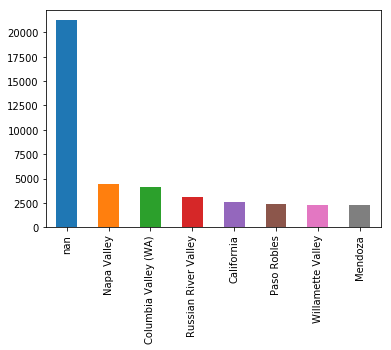

In [57]:
# Optional dropna argument can make a big difference in value_counts
reviews.region_1.value_counts().head(8).plot.bar()
plt.show()
reviews.region_1.value_counts(dropna=False).head(8).plot.bar()
plt.show()


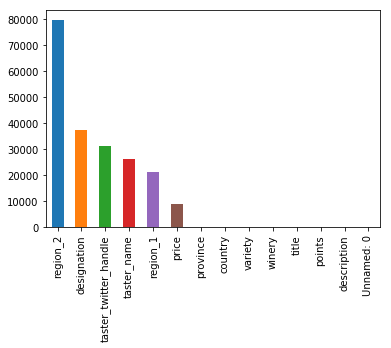

In [60]:
# Boolean type True=1 and False=0, so sum=number_True 
reviews.isnull().sum().sort_values(ascending=False).plot.bar()
plt.show()

In [20]:
# Replacing NaN
reviews.region_2.fillna("Unknown")

0         Unknown
1         Unknown
           ...   
129969    Unknown
129970    Unknown
Name: region_2, Length: 129971, dtype: object

In [36]:
# Replacing non-null values - .replace
#   Can be applied to series or entire dataframe
#   to_replace must match cell contents exactly or regex can be used
#   inplace=False by default
reviews.points.replace(87, 5)
reviews.replace(0, 5)
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0            @kerino
1         @vossroger
             ...    
129969    @vossroger
129970    @vossroger
Name: taster_twitter_handle, Length: 129971, dtype: object